In [5]:
import numpy as np
from squlearn.encoding_circuit import ChebyshevRx
from squlearn.observables import SummedPaulis
from squlearn import Executor

from squlearn.qnn.lowlevel_qnn_pennylane import LowLevelQNNPennyLane
from squlearn.qnn.lowlevel_qnn_qiskit import LowLevelQNN

import pennylane as qml
import pennylane.numpy as pnp

In [6]:
pqc = ChebyshevRx(2,1)
obs1 = SummedPaulis(2)
obs2 = SummedPaulis(2)
obs3 = SummedPaulis(2)

np.random.seed(0)
param = np.random.rand(pqc.num_parameters)
param_obs = np.random.rand(obs1.num_parameters+obs2.num_parameters)

qnn = LowLevelQNNPennyLane(pqc, [obs1,obs2], None)

self._pennylane_gates [<class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.parametric_ops_single_qubit.RX'>, <class 'pennylane.ops.qubit.non_parametric_ops.CNOT'>]
self._pennylane_gates_param_function [(<function _lambdifygenerated at 0x0000019A1BFB92D0>,), (<function _lambdifygenerated at 0x0000019A1BFB95A0>,), (<function _lambdifygenerated at 0x0000019A1BFB8280>,), (<function _lambdifygenerated at 0x0000019A1BFBA7A0>,), None]
self._pennylane_gates_wires [[0], [1], [0], [1], [0, 1]]
self._pennylane_gates_parameters ['param', 'x']
self._pennylane_gates_parameters ['param', 'x']


c:\Users\DKR\Documents\Git Repositories\squlearn_fork\squlearn\.venv\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


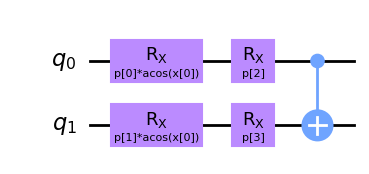

In [7]:
pqc.draw()

In [8]:
xx = [[0.5],[0.6]]
pp = [param,2*param]
qq = [param_obs,2*param_obs]

x_ = []
p_ = []
q_ = []


for xxx in xx:
    for ppp in pp:
        for qqq in qq:
            x_.append(xxx)
            p_.append(ppp)
            q_.append(qqq)

x_ = pnp.array(x_,requires_grad=True).transpose()
p_ = pnp.array(p_,requires_grad=False).transpose()
q_ = pnp.array(q_,requires_grad=False).transpose()



val = qml.jacobian(qnn._pennylane_circuit)(p_, x_, q_)

vall = np.array(val)
vall = vall.sum(axis=1)
print("vall",vall)
print("vall.shape",vall.shape)
vall = vall.transpose([2,0,1])
#print("vall transposed",vall)
#vall = vall.transpose([1,0,2])
print("vall transposed2",vall)
vall = vall.reshape(len(xx),len(pp),len(qq),qnn.num_operator,qnn.num_features)
print("vall",vall)
print("vall.shape",vall.shape)

self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [tensor([0.5488135 , 0.5488135 , 1.09762701, 1.09762701, 0.5488135 ,
        0.5488135 , 1.09762701, 1.09762701], requires_grad=False), tensor([0.71518937, 0.71518937, 1.43037873, 1.43037873, 0.71518937,
        0.71518937, 1.43037873, 1.43037873], requires_grad=False), tensor([0.60276338, 0.60276338, 1.20552675, 1.20552675, 0.60276338,
        0.60276338, 1.20552675, 1.20552675], requires_grad=False), tensor([0.54488318, 0.54488318, 1.08976637, 1.08976637, 0.54488318,
        0.54488318, 1.08976637, 1.08976637], requires_grad=False), <autograd.numpy.numpy_boxes.ArrayBox object at 0x0000019A1C059A80>]
vall [[[ 0.58131502  1.16263004 -0.02287    -0.04573999  0.65477541
    1.30955082  0.03199145  0.0639829 ]]

 [[ 0.7421632   1.4843264   0.33681279  0.67362558  0.81832454
    1.63664909  0.46156589  0.92313179]]]
vall.shape (2, 1, 8)
vall transposed2 [[[ 0.58131502]
  [ 0.7421632

In [9]:
qnn_qiskit = LowLevelQNN(pqc, [obs1,obs2], Executor())

In [10]:
val = qnn_qiskit.evaluate([0.5,0.6],[param,2*param],[param_obs,2*param_obs],"dfdx")["dfdx"]
print(val)
print(val.shape)

[[[[[ 0.58131502]
    [ 0.7421632 ]]

   [[ 1.16263004]
    [ 1.4843264 ]]]


  [[[-0.02287   ]
    [ 0.33681279]]

   [[-0.04573999]
    [ 0.67362558]]]]



 [[[[ 0.65477541]
    [ 0.81832454]]

   [[ 1.30955082]
    [ 1.63664909]]]


  [[[ 0.03199145]
    [ 0.46156589]]

   [[ 0.0639829 ]
    [ 0.92313179]]]]]
(2, 2, 2, 2, 1)


In [11]:
xx = [[0.5],[0.6]]
pp = [param,2*param]
qq = [param_obs,2*param_obs]

x_ = []
p_ = []
q_ = []


for xxx in xx:
    for ppp in pp:
        for qqq in qq:
            x_.append(xxx)
            p_.append(ppp)
            q_.append(qqq)

x_ = pnp.array(x_,requires_grad=False).transpose()
p_ = pnp.array(p_,requires_grad=True).transpose()
q_ = pnp.array(q_,requires_grad=False).transpose()

val = qml.jacobian(qnn._pennylane_circuit)(p_, x_, q_)

vall = np.array(val)
vall = vall.sum(axis=1)
print("vall",vall)
print("vall.shape",vall.shape)
vall = vall.transpose([2,0,1])
#print("vall transposed",vall)
#vall = vall.transpose([1,0,2])
print("vall transposed2",vall)
vall = vall.reshape(len(xx),len(pp),len(qq),qnn.num_operator,qnn.num_parameters)
print("vall",vall)
print("vall.shape",vall.shape)

self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [<autograd.numpy.numpy_boxes.ArrayBox object at 0x0000019A1C1C6DC0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x0000019A1C1C7980>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x0000019A1C1C6EC0>, <autograd.numpy.numpy_boxes.ArrayBox object at 0x0000019A1C1C6AC0>, tensor([0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6], requires_grad=False)]
vall [[[-0.74046648 -1.48093297 -0.20295213 -0.40590426 -0.6659767
   -1.33195341 -0.23465263 -0.46930526]
  [-0.16892925 -0.33785849  0.1702392   0.3404784  -0.16812202
   -0.33624403  0.16347324  0.32694649]
  [-0.70709341 -1.41418681 -0.19380501 -0.38761002 -0.71819275
   -1.4363855  -0.25305062 -0.50610124]
  [-0.16131555 -0.3226311   0.16256646  0.32513292 -0.18130366
   -0.36260732  0.1762904   0.3525808 ]]

 [[-1.0335034  -2.06700679 -0.47268443 -0.94536886 -0.91415696
   -1.82831392 -0.49862265 -0.99724531]
  [-0.14802646 -0.29605293

In [12]:
val = qnn_qiskit.evaluate([0.5,0.6],[param,2*param],[param_obs,2*param_obs],"dfdp")["dfdp"]
print(val)
print(val.shape)

[[[[[-0.74046648 -0.16892925 -0.70709341 -0.16131555]
    [-1.0335034  -0.14802646 -0.98692305 -0.14135486]]

   [[-1.48093297 -0.33785849 -1.41418681 -0.3226311 ]
    [-2.06700679 -0.29605293 -1.97384609 -0.28270972]]]


  [[[-0.20295213  0.1702392  -0.19380501  0.16256646]
    [-0.47268443  0.14917433 -0.45138038  0.14245099]]

   [[-0.40590426  0.3404784  -0.38761002  0.32513292]
    [-0.94536886  0.29834865 -0.90276076  0.28490198]]]]



 [[[[-0.6659767  -0.16812202 -0.71819275 -0.18130366]
    [-0.91415696 -0.14731912 -0.98583163 -0.1588697 ]]

   [[-1.33195341 -0.33624403 -1.4363855  -0.36260732]
    [-1.82831392 -0.29463823 -1.97166327 -0.31773941]]]


  [[[-0.23465263  0.16347324 -0.25305062  0.1762904 ]
    [-0.49862265  0.14324557 -0.53771727  0.15447677]]

   [[-0.46930526  0.32694649 -0.50610124  0.3525808 ]
    [-0.99724531  0.28649114 -1.07543454  0.30895353]]]]]
(2, 2, 2, 2, 4)


In [13]:
xx = [[0.5],[0.6]]
pp = [param,2*param]
qq = [param_obs,2*param_obs]

x_ = []
p_ = []
q_ = []


for xxx in xx:
    for ppp in pp:
        for qqq in qq:
            x_.append(xxx)
            p_.append(ppp)
            q_.append(qqq)

x_ = pnp.array(x_,requires_grad=False).transpose()
p_ = pnp.array(p_,requires_grad=False).transpose()
q_ = pnp.array(q_,requires_grad=True).transpose()

val = qml.jacobian(qnn._pennylane_circuit)(p_, x_, q_)

vall = np.array(val)
vall = vall.sum(axis=1)
print("vall",vall)
print("vall.shape",vall.shape)
vall = vall.transpose([2,0,1])
#print("vall transposed",vall)
#vall = vall.transpose([1,0,2])
print("vall transposed2",vall)
vall = vall.reshape(len(xx),len(pp),len(qq),qnn.num_operator,qnn.num_parameters_observable)
print("vall",vall)
print("vall.shape",vall.shape)

self._pennylane_gates_parameters ['param', 'x']
self._pennylane_obs_parameters ['param_obs']
circ_param_list [tensor([0.5488135 , 0.5488135 , 1.09762701, 1.09762701, 0.5488135 ,
        0.5488135 , 1.09762701, 1.09762701], requires_grad=False), tensor([0.71518937, 0.71518937, 1.43037873, 1.43037873, 0.71518937,
        0.71518937, 1.43037873, 1.43037873], requires_grad=False), tensor([0.60276338, 0.60276338, 1.20552675, 1.20552675, 0.60276338,
        0.60276338, 1.20552675, 1.20552675], requires_grad=False), tensor([0.54488318, 0.54488318, 1.08976637, 1.08976637, 0.54488318,
        0.54488318, 1.08976637, 1.08976637], requires_grad=False), tensor([0.5, 0.5, 0.5, 0.5, 0.6, 0.6, 0.6, 0.6], requires_grad=False)]
vall [[[ 1.          1.          1.          1.          1.
    1.          1.          1.        ]
  [ 0.38325405  0.38325405 -0.70623267 -0.70623267  0.44316014
    0.44316014 -0.60721818 -0.60721818]
  [ 0.10479738  0.10479738  0.60062264  0.60062264  0.15724205
    0.1572420

In [14]:
val = qnn_qiskit.evaluate([0.5,0.6],[param,2*param],[param_obs,2*param_obs],"dfdop")["dfdop"]
print(val)
print(val.shape)

[[[[[ 1.          0.38325405  0.10479738  0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.38325405
      0.10479738]]

   [[ 1.          0.38325405  0.10479738  0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.38325405
      0.10479738]]]


  [[[ 1.         -0.70623267  0.60062264  0.          0.
      0.        ]
    [ 0.          0.          0.          1.         -0.70623267
      0.60062264]]

   [[ 1.         -0.70623267  0.60062264  0.          0.
      0.        ]
    [ 0.          0.          0.          1.         -0.70623267
      0.60062264]]]]



 [[[[ 1.          0.44316014  0.15724205  0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.44316014
      0.15724205]]

   [[ 1.          0.44316014  0.15724205  0.          0.
      0.        ]
    [ 0.          0.          0.          1.          0.44316014
      0.15724205]]]


  [[[ 1.         -0.60721818  0.